<a href="https://colab.research.google.com/github/Siripurapu-VighnaChaitanya/ML_practice_files/blob/main/Zomato%20Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [7]:
ds = pd.read_csv('Zomato Review.csv')

In [19]:
ds.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
corpus=[]
print(corpus)

[]


In [8]:
for i in range(len(ds)):
  zomato_rating=re.sub(r'[^a-zA-Z]',' ',ds['Review'][i])
  zomato_rating=zomato_rating.lower()
  zomato_rating=zomato_rating.split()
  sbs=SnowballStemmer(language='english')
  zomato_rating=[sbs.stem(word) for word in zomato_rating if word not in set(stopwords.words('english'))]
  zomato_rating=' '.join(zomato_rating)
  corpus.append(zomato_rating)

In [9]:
len(corpus)

1000

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(corpus).toarray()
y=ds.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [13]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1,

0.725

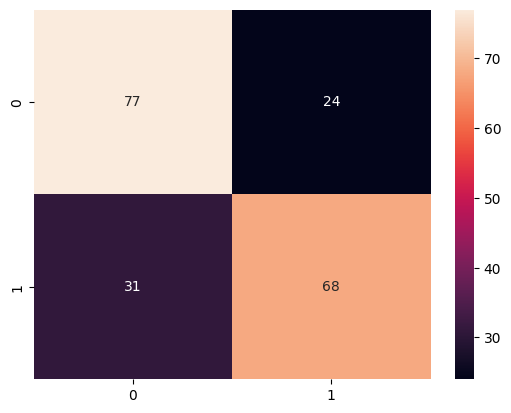

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
sb.heatmap(cm,annot=True)
accuracy_score(y_pred,y_test)

In [24]:
text='good tast and the texture was just nasty.'
random_text=np.array(text).reshape(1,)

In [25]:
random_pred=tf.transform(random_text)

In [26]:
random_pred.shape

(1, 1548)

In [27]:
print(classifier.predict(random_pred))

[1]
